In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

<h1>The steps involved in solving a problem with machine learning techniques</h1>
<ol>
    <li>Data Preprocessing</li>
    <li>Define "error"</li>
    <li>Split the data into two parts : Training data and Testing data</li>
    <li>Train the model : This step involves "learning" the target function from the given training data. Choose the appropriate Machine Learning algorithm for the problem. Train it on the data. Test the  model with the testing data</li>
    <li>Prediction : Obtain the predicted values for the given input and vizualize the results</li>
</ol>

<h1> Step 1 : Data Preprocessing </h1>

<h2>Load the dataset</h2>

In [3]:
#Load the dataset
boston=load_boston()

# Data Set Characteristics  

**Number of Instances**: 506

**Number of Attributes** : 13 numeric/categorical predictive

**Attribute Information (in order)**:
    - CRIM     per capita crime rate by town
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS    proportion of non-retail business acres per town
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX      nitric oxides concentration (parts per 10 million)
    - RM       average number of rooms per dwelling
    - AGE      proportion of owner-occupied units built prior to 1940
    - DIS      weighted distances to five Boston employment centres
    - RAD      index of accessibility to radial highways
    - TAX      full-value property-tax rate per 10,000 dollars
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in $1000's


In [4]:
#Put the data into pandas DataFrames
features = pd.DataFrame(boston.data,columns=boston.feature_names)
target = pd.DataFrame(boston.target,columns=['target'])

In [5]:
# Concatenate features and target into a single DataFrame 
#axis = 1 makes it concatenate column wise
df=pd.concat([features,target],axis=1)

<h2>Use describe() to generate a summary of the dataset</h2>

The describe() method computes the following parameters for each column
- count - Number of rows
- mean - Mean of the column
- std - Standard Deviation of the column
- min - Minimum value in the column
- max - Maximum value in the column
- 25% - 25 percentile
- 50% - 50 percentile
- 75% - 75 percentile

### Percentile - A percentile (or a centile) is a measure used in statistics indicating the value below which a given percentage of observations in a group of observations falls.



In [6]:
# Use round(decimals=2) to set the precision to 2 decimal places
df.describe().round(decimals = 2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


<h2>Vizualize correlations of each attribute with the target</h2>

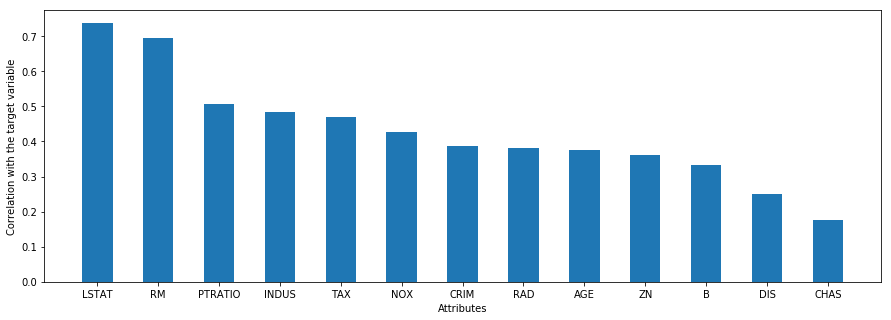

In [7]:
# Calculate correlation between every column on the data
corr = df.corr('pearson')

# Take absolute values of correlations
corrs = [abs(corr[attr]['target']) for attr in list(features)]

# Make a list of pairs [(corr, feature)]
l = list(zip(corrs, list(features)))

# Sort the list of pairs in reverse/descending order,
# with the correlation value as the key for sorting
l.sort(key = lambda x : x[0], reverse=True)

# "Unzip" pairs to two lists
# zip(*l) - takes a list that looks like [[a,b,c], [d,e,f], [g,h,i]] 
# and returns [[a,d,g],[b,e,h],[c,f,i]]
corrs, labels = list(zip((*l)))

#Plot correlations with respect to the target variable as a bar graph
index = np.arange(len(labels))
plt.figure(figsize=(15, 5))
plt.bar(index, corrs, width=0.5)
plt.xlabel('Attributes')
plt.ylabel('Correlation with the target variable')
plt.xticks(index, labels)
plt.show()

<h2>We observe from the bar graph generated above, that LSTAT and RM have the two highest absolute correlation values</h2>

## Normalize the data
Normalize the data with MinMaxScaler

In [8]:
# Choose RM as the independent variable for linear regression
X=df['LSTAT'].values
Y=df['target'].values

In [9]:
#Before normalization
print(Y[:5])

[24.  21.6 34.7 33.4 36.2]


In [10]:
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X.reshape(-1, 1))
X = X[:, -1]
y_scaler = MinMaxScaler()
Y = y_scaler.fit_transform(Y.reshape(-1, 1))
Y = Y[:, -1]

In [11]:
#After normalization
print(Y[:5])

[0.42222222 0.36888889 0.66       0.63111111 0.69333333]


## Step 2 : Define error

### MSE - Mean Squared Error
\begin{equation*}
MSE = \frac{1}{n} \sum_{i=1}^n (\hat{X_{i}} - X_{i})^{2}
\end{equation*}

# Step 3 : Split the data

- **Split the data into training and testing data** : The data is split before the training step and the samples in the sets of data do not change during the course of the training process</li>
- **Cross Validation** : Split the data into equal chunks. At each step of training, choose one chunk of data as training data and other chunks as testing data

We will not use cross validation as it is out of the scope of this lesson. It will be presented in a future lesson

<h2>Splitting data into fixed sets</h2>

In [12]:
#0.2 indicates 20% of the data is randomly sampled as testing data
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)

<h1>Step 4 : Build the model</h1>

<h2>The three functions that constitute the model are :</h2>
<ol>
    <li>error : This function returns the mean squared error in the predicted values for the given m and c</li>
    <li>hypothesis : This function returns the predicted value for the given input</li>
    <li>update : This function changes the values of m and c</li>
    <li>gradient_descent : This function implements gradient descent</li>
</ol>
    

Error : 
\begin{equation*}
squared\ error = \sum_{k=1}^n \left( h(x_k, a, b) - t_k \right)^2 
\end{equation*}

\begin{equation*}
mean\ squared\ error = \frac{1}{2 * n} * squared\ error
\end{equation*}


In [13]:
def error(m, x, c, t):
    N = x.size
    e = sum(((m * x + c) - t) ** 2)
    return  e * 1/(2 * N)

Hypothesis :
\begin{equation*}
y = mx + c
\end{equation*}

## Equations to update weights
\begin{equation*}
gradient_m = \sum_{k=1}^n \left(2 * ((m x_k + c) - t_k) * x_k * learning\_rate\right)
\end{equation*}


\begin{equation*}
gradient_c = \sum_{k=1}^n \left(2 * ((m x_k + c) - t_k) * learning\_rate\right)
\end{equation*}


\begin{equation*}
m = m - gradient_m
\end{equation*}


\begin{equation*}
c = c - gradient_c
\end{equation*}

These equations are implemented below in the update() functions. <br>
grad_m and grad_c are calculated as **vectorized operations**


In [14]:
def update(m, x, c, t, learning_rate):
    grad_m = sum(2 * ((m * x + c) - t) * x)
    grad_c = sum(2 * ((m * x + c) - t))
    m = m - grad_m * learning_rate
    c = c - grad_c * learning_rate
    return m, c

**Error Threshold** : If the error falls below the threshold, the gradient descent process is stopped and the weights are returned

In [15]:
def gradient_descent(init_m, init_c, x, t, learning_rate, iterations, error_threshold):
    m = init_m
    c = init_c
    error_values = list()
    mc_values = list()
    for i in range(iterations):
        e = error(m, x, c, t)
        if e < error_threshold:
            print('Error less than the threshold. Stopping gradient descent')
            break
        error_values.append(e)
        m, c = update(m, x, c, t, learning_rate)
        mc_values.append((m, c))
    return m, c, error_values, mc_values

### The parameters may be changed to varied to observe the computation vs accuracy trade-offs. 
- Learning Rate : Increasing the learning rate reduces the convergence time. But, if the learning rate is too high the model will overshoot the minima
- Iterations : Number of iterations must be large enough to allow the model to converge to a minima, but if it is too large, then the model becomes too specific to the training data thus causing overfitting, i.e, the model "memorizes" the data instead of "learning" the data. 

## TODO : Provide accurate explanations for these parameters

In [16]:
init_m = 0
init_c = 0
learning_rate = 0.001
iterations = 1000
error_threshold = 0.001

In [17]:
m, c, error_values, mc_values = gradient_descent(init_m, init_c, xtrain, ytrain, learning_rate, iterations, 
                                                 error_threshold)

## Vizualization of the learning process
1 . **Plot the regression line** against the training data set to vizualize what the line looks like for the training data set<br>
2 . **Plot the error values**: This graph will show you how the error drops over time<br>
3 . **Plot the change in regression line throught the training process**: This graph helps you vizualize how m and c values are update after each step.


### Plotting the regression line upon the training data set

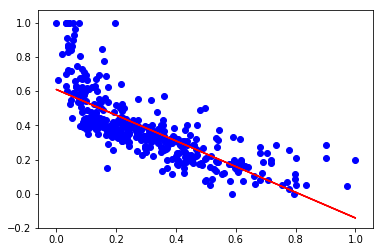

In [18]:
plt.scatter(xtrain, ytrain, color='b')
plt.plot(xtrain, (m * xtrain + c) , color='r')

### Plotting error values

Text(0.5, 0, 'Iterations')

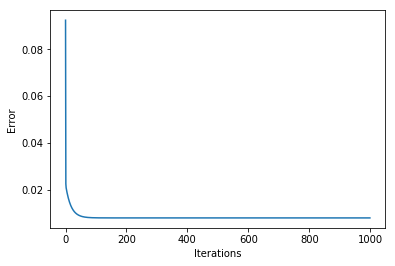

In [19]:
plt.plot(np.arange(len(error_values)), error_values)
plt.ylabel('Error')
plt.xlabel('Iterations')

# Commented animation code because it does not render properly in the browser. I will try to find a fix for it. <br>

# It works when you run the script from terminal. Download the notebook as a python script.

In [20]:
# %matplotlib notebook

# fig, ax = plt.subplots()
# ln, = plt.plot([], [], 'ro-', animated=True)
# plt.scatter(xtest, ytest, color='g')

# def init():
#     ax.set_xlim(0, 1.0)
#     ax.set_ylim(0, 1.0)
#     return ln,

# def update(frame):
#     m , c = mc_values[frame]
#     x1, y1 = 0.00, m * 0.01 + c
#     x2, y2 = 1.0, m * 0.99 + c
#     ln.set_data([x1, x2], [y1, y2])
#     return ln,          


# ani = FuncAnimation(fig, update, frames=range(len(mc_values)),
#             init_func=init, blit=True)
# plt.show()

# Step 5 : Prediction

After Step 4, we obtain the final values of m and c. Using these values we obtain the predictions for the values in the testing data<br><br>
We will then evaluate the model with certain metrics such as RMSE, R2 score etc. The choice of these metrics will depend on the type of data.(Categorical, continuous etc)

## Prediction

In [21]:
# Calculate the predictions on the test set as a vectorized operation
predicted = (m * xtest) + c

In [22]:
# Compute MSE for the predicted values on the testing set
mean_squared_error(ytest, predicted)

0.030264756134774327

In [23]:
p = pd.DataFrame(list(zip(xtest, ytest,predicted)), columns=['x', 'target_y', 'predicted_y'])

## Plot the predicted values against the target values
1 . Predicted values are represented by the red colored line<br>
2 . Target values are represented by blue colored points

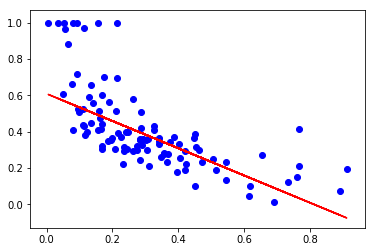

In [24]:
plt.scatter(xtest, ytest, color='b')
plt.plot(xtest, predicted , color='r')

## Revert normalization to obtain the predicted price of the houses in $1000s
The predicted values are in the range 0 - 1. This is not very useful to us when we want to obtain the price. <br> Use inverse_transform() to scale the values back to original representation

In [25]:
# Reshape to change the shape that is requied by the scaler
predicted = np.array(predicted).reshape(-1, 1)
xtest = np.array(xtest).reshape(-1, 1)
ytest = np.array(ytest).reshape(-1, 1)

xtest_scaled = x_scaler.inverse_transform(np.array(xtest).reshape(-1, 1))
ytest_scaled = y_scaler.inverse_transform(np.array(ytest).reshape(-1, 1))
predicted_scaled = y_scaler.inverse_transform(np.array(predicted).reshape(-1, 1))

# This is to remove the extra dimension
xtest_scaled = xtest_scaled[:, -1]
ytest_scaled = ytest_scaled[:, -1]
predicted_scaled = predicted_scaled[:, -1]

p = pd.DataFrame(list(zip(xtest_scaled, ytest_scaled,predicted_scaled)), columns=['x', 'target_y', 'predicted_y'])
p = p.round(decimals = 2)
p.head()

,x,target_y,predicted_y
0,16.14,13.1,18.99
1,12.73,21.0,22.17
2,11.25,31.0,23.55
3,13.51,23.3,21.44
4,12.92,21.2,21.99


# Do the following :
- Choose a different attribute for learning the regression and analyze how well it predicts the target
- Vary the parameters such as the learning rate, initial values, iterations